<a href="https://colab.research.google.com/github/ShivaniH2020/Repository/blob/main/Assignment2_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import numpy as np
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt

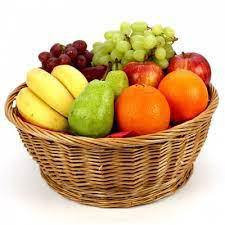

In [59]:
data_img='/content/drive/My Drive/Fruits.jpeg'

image=PIL.Image.open(data_img)
PIL.Image.open(data_img)

In [60]:
print(image.format)
print(image.size)
print(image.mode)


JPEG
(225, 225)
RGB


In [61]:
import cv2
tempPath=data_img
img=cv2.imread(str(tempPath))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)                         
print(img)

[[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [254 254 254 ... 255 255 255]
 [254 254 254 ... 255 255 255]
 [254 254 254 ... 255 255 254]]


In [62]:
from PIL import Image
from numpy import asarray

data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(225, 225, 3)
<class 'PIL.Image.Image'>
RGB
(225, 225)


In [63]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [ ]:
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt


def entropy(signal):
        '''
        function returns entropy of a signal
        signal must be a 1-D numpy array
        '''
        lensig=signal.size
        symset=list(set(signal))
        numsym=len(symset)
        propab=[np.size(signal[signal==i])/(1.0*lensig) for i in symset]
        ent=np.sum([p*np.log2(1.0/p) for p in propab])
        return ent

In [ ]:
def imageEntropy(colorIm, image_caption, image_height, image_width, DPI):
        #colorIm=Image.open(file_name)
        greyIm=colorIm
        colorIm=np.array(colorIm)
        greyIm=np.array(greyIm)
        N=5
        S=greyIm.shape
        E=np.array(greyIm)
        for row in range(S[0]):
                for col in range(S[1]):
                        Lx=np.max([0,col-N])
                        Ux=np.min([S[1],col+N])
                        Ly=np.max([0,row-N])
                        Uy=np.min([S[0],row+N])
                        region=greyIm[Ly:Uy,Lx:Ux].flatten()
                        E[row,col]=entropy(region)

        plt.subplot(1,3,3)
        plt.imshow(E, cmap='gray')
        plt.xlabel(image_caption)
        figure = plt.gcf() # get current figure
        figure.set_size_inches(image_height, image_width)#in inches
        # when saving, specify the DPI
       
        #plt.colorbar()        

In [64]:
box3=np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
box5=np.array([[1/25,1/25,1/25,1/25,1/25],[1/25,1/25,1/25,1/25,1/25],[1/25,1/25,1/25,1/25,1/25],[1/25,1/25,1/25,1/25,1/25],[1/25,1/25,1/25,1/25,1/25]])

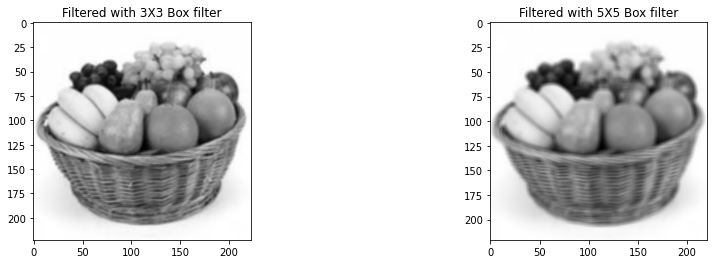

In [76]:
#Box Filter with padding 0, stride 1 (default values of padding and stride)
boxfiltered_image1 = convolve2D(img, box3)
boxfiltered_image2 = convolve2D(img, box5)
f, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].set_title('Filtered with 3X3 Box filter')
ax[0].imshow(boxfiltered_image1, cmap='gray')
ax[1].set_title('Filtered with 5X5 Box filter')
ax[1].imshow(boxfiltered_image2, cmap='gray')

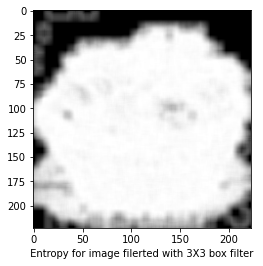

In [77]:
imageEntropy(boxfiltered_image1," Entropy for image filerted with 3X3 box filter ",15,4,600)

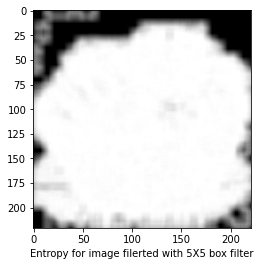

In [78]:
imageEntropy(boxfiltered_image2,"Entropy for image filerted with 5X5 box filter",15,4,600)

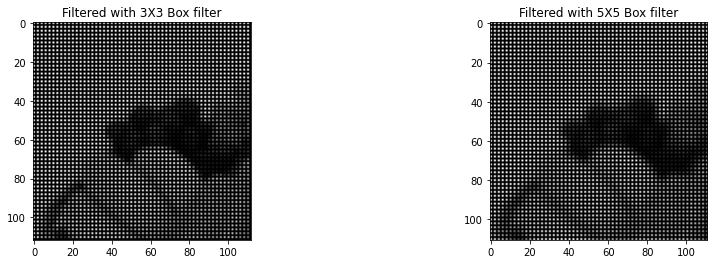

In [79]:
#Box Filter with padding 0, stride 2

boxfiltered_image1 = convolve2D(img, box3,0,2)
boxfiltered_image2 = convolve2D(img, box5,0,2)
f, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].set_title('Filtered with 3X3 Box filter')
ax[0].imshow(boxfiltered_image1, cmap='gray')
ax[1].set_title('Filtered with 5X5 Box filter')
ax[1].imshow(boxfiltered_image2, cmap='gray')


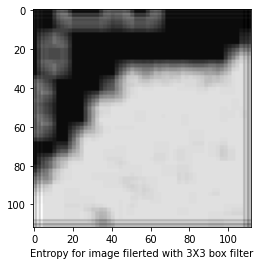

In [80]:
imageEntropy(boxfiltered_image1,"Entropy for image filerted with 3X3 box filter",15,4,600)

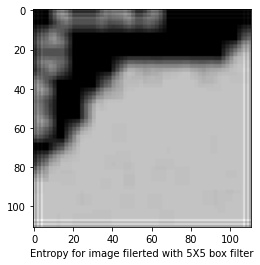

In [81]:
imageEntropy(boxfiltered_image2,"Entropy for image filerted with 5X5 box filter",15,4,600)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 254. 254. ... 254. 254.   0.]
 [  0. 254. 254. ... 254. 254.   0.]
 ...
 [  0. 254. 254. ... 255. 255.   0.]
 [  0. 254. 254. ... 255. 254.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 254. 254. ... 254. 254.   0.]
 [  0. 254. 254. ... 254. 254.   0.]
 ...
 [  0. 254. 254. ... 255. 255.   0.]
 [  0. 254. 254. ... 255. 254.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


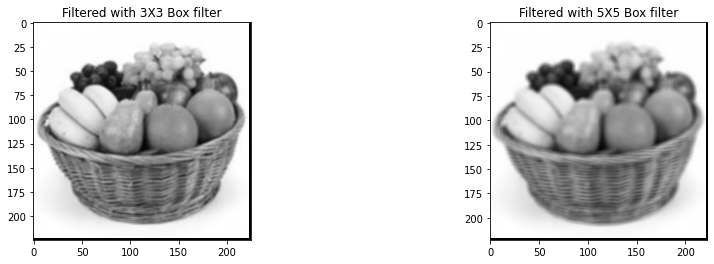

In [82]:
#Box Filter with padding 1, stride 1 

boxfiltered_image1 = convolve2D(img, box3,1)
boxfiltered_image2 = convolve2D(img, box5,1)
f, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].set_title('Filtered with 3X3 Box filter')
ax[0].imshow(boxfiltered_image1, cmap='gray')
ax[1].set_title('Filtered with 5X5 Box filter')
ax[1].imshow(boxfiltered_image2, cmap='gray')

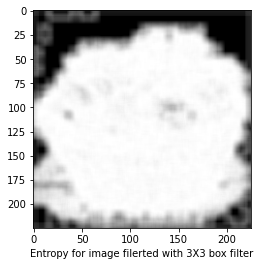

In [83]:
imageEntropy(boxfiltered_image1,"Entropy for image filerted with 3X3 box filter",15,4,600)

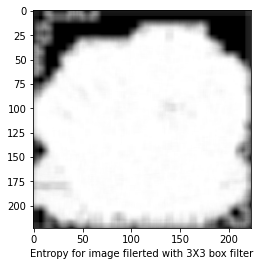

In [84]:
imageEntropy(boxfiltered_image2,"Entropy for image filerted with 3X3 box filter",15,4,600)

In [73]:
weightedAvg=np.array([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]])

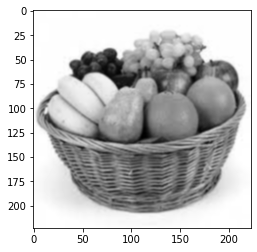

In [85]:
# Weighted Average Filter with padding 0, stride 1 (default values of padding and stride)
weightedavgfiltered_image1 = convolve2D(img, weightedAvg)
plt.imshow(weightedavgfiltered_image1,'gray')
plt.show()


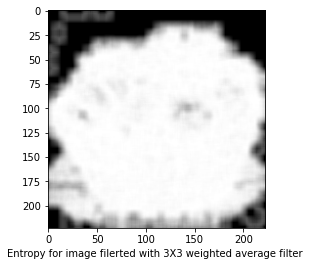

In [87]:
imageEntropy(weightedavgfiltered_image1,"Entropy for image filerted with 3X3 weighted average filter ",15,4,600)

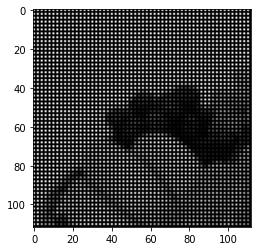

In [88]:
# Weighted Average  Filter with padding 0, stride 1 (default values of padding and stride)
weightedavgfiltered_image1 = convolve2D(img, weightedAvg,0,2)
plt.imshow(weightedavgfiltered_image1,'gray')
plt.show()


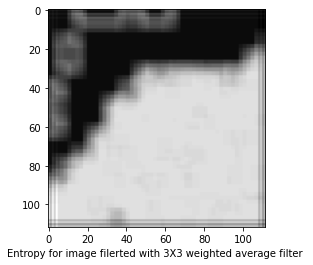

In [89]:
imageEntropy(weightedavgfiltered_image1,"Entropy for image filerted with 3X3 weighted average filter ",15,4,600)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 254. 254. ... 254. 254.   0.]
 [  0. 254. 254. ... 254. 254.   0.]
 ...
 [  0. 254. 254. ... 255. 255.   0.]
 [  0. 254. 254. ... 255. 254.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


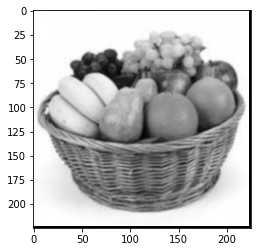

In [90]:
# Weighted Average  Filter with padding 0, stride 1 (default values of padding and stride)
weightedavgfiltered_image1 = convolve2D(img, weightedAvg,1)
plt.imshow(weightedavgfiltered_image1,'gray')
plt.show()


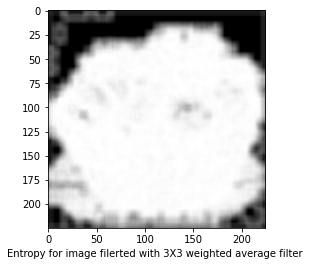

In [91]:
imageEntropy(weightedavgfiltered_image1,"Entropy for image filerted with 3X3 weighted average filter ",15,4,600)

In [92]:
# 3x3 sobel filter 
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

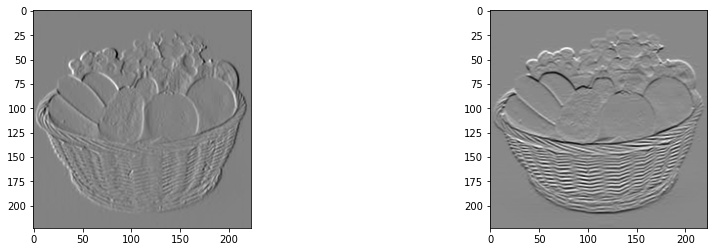

In [93]:
# filter the image using filter2D(grayscale image, bit-depth, kernel)  
filtered_image1 = convolve2D(img, sobel_x)
filtered_image2 = convolve2D(img, sobel_y)
f, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].imshow(filtered_image1, cmap='gray')
ax[1].imshow(filtered_image2, cmap='gray')



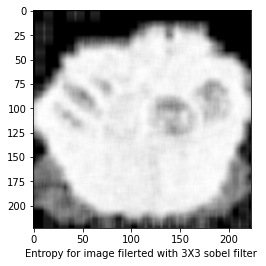

In [94]:
imageEntropy(filtered_image1,"Entropy for image filerted with 3X3 sobel filter ",15,4,600)

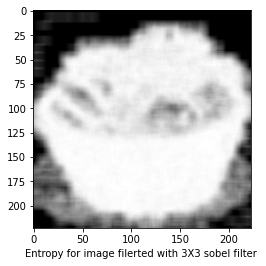

In [95]:
imageEntropy(filtered_image2,"Entropy for image filerted with 3X3 sobel filter ",15,4,600)

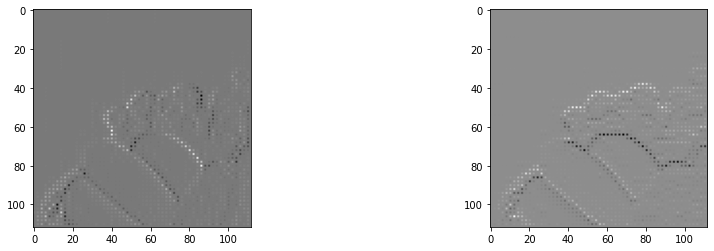

In [96]:
filtered_image1 = convolve2D(img, sobel_x,0,2)
filtered_image2 = convolve2D(img, sobel_y,0,2)
f, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].imshow(filtered_image1, cmap='gray')
ax[1].imshow(filtered_image2, cmap='gray')

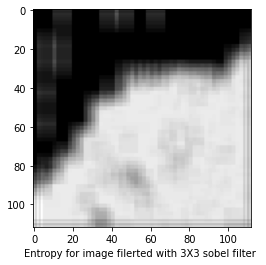

In [97]:
imageEntropy(filtered_image1,"Entropy for image filerted with 3X3 sobel filter ",15,4,600)

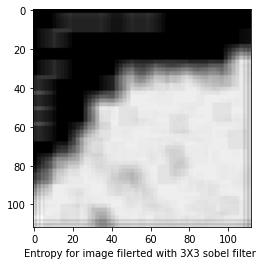

In [98]:
imageEntropy(filtered_image2,"Entropy for image filerted with 3X3 sobel filter ",15,4,600)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 254. 254. ... 254. 254.   0.]
 [  0. 254. 254. ... 254. 254.   0.]
 ...
 [  0. 254. 254. ... 255. 255.   0.]
 [  0. 254. 254. ... 255. 254.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 254. 254. ... 254. 254.   0.]
 [  0. 254. 254. ... 254. 254.   0.]
 ...
 [  0. 254. 254. ... 255. 255.   0.]
 [  0. 254. 254. ... 255. 254.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


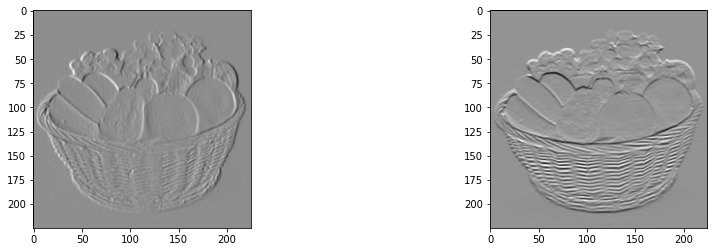

In [99]:
filtered_image1 = convolve2D(img, sobel_x,1)
filtered_image2 = convolve2D(img, sobel_y,1)
f, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].imshow(filtered_image1, cmap='gray')
ax[1].imshow(filtered_image2, cmap='gray')

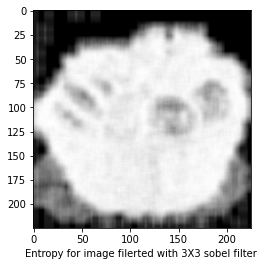

In [100]:
imageEntropy(filtered_image1,"Entropy for image filerted with 3X3 sobel filter ",15,4,600)

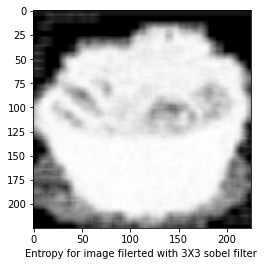

In [101]:
imageEntropy(filtered_image2,"Entropy for image filerted with 3X3 sobel filter ",15,4,600)